<a href="https://colab.research.google.com/github/ElenaKapetanoudi/Machine-Learning-Exercise-7/blob/main/Exercise_7_SVM_%26_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import re
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.naive_bayes import GaussianNB

# SVM & Bayes

## Question 1

### Load Dataset

In [33]:
df = pd.read_csv('train.csv')

df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


### Train & Test Sets Split

In [34]:
x = df.drop('target', axis=1)
y = df['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, stratify=y, random_state=0)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((6851, 4), (762, 4), (6851,), (762,))

### Target Bar Plots

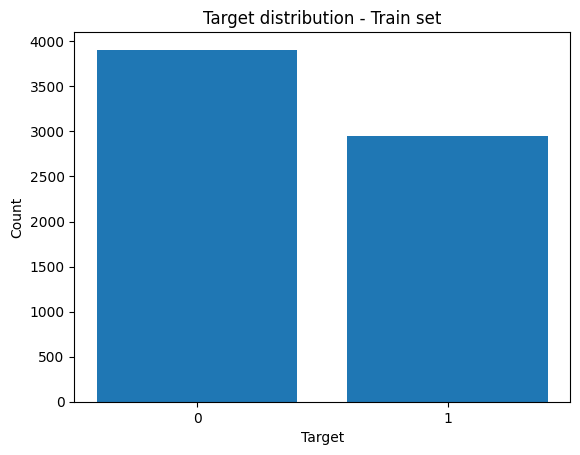

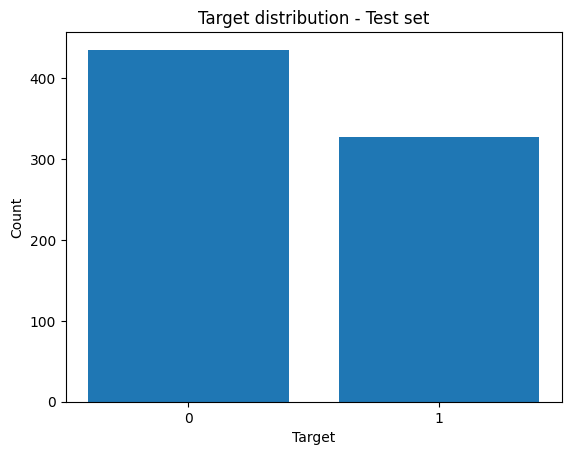

In [35]:
train_counts = y_train.value_counts()
test_counts = y_test.value_counts()

plt.bar(train_counts.index, train_counts.values)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Target distribution - Train set')
plt.xticks([0, 1])
plt.show()

plt.bar(test_counts.index, test_counts.values)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Target distribution - Test set')
plt.xticks([0, 1])
plt.show()


### Observation

Το dataset δεν είναι πλήρως ισορροπημένο, καθώς η κατανομή των δύο κλάσεων δεν είναι ίση. Συγκεκριμένα, περίπου το 57% των παρατηρήσεων ανήκει στην κλάση target = 0 (αναρτήσεις που δεν αφορούν πραγματικές φυσικές καταστροφές σε εξέλιξη), ενώ το υπόλοιπο 43% ανήκει στην κλάση target = 1 (αναρτήσεις που αφορούν πραγματικές φυσικές καταστροφές σε εξέλιξη). Ωστόσο, η ανισορροπία αυτή δεν είναι έντονη. Επιπλέον, με τον διαχωρισμό του dataset σε σύνολα εκπαίδευσης και δοκιμής, χρησιμοποιώντας stratify, διατηρήθηκε η ίδια αναλογία των κλάσεων και στα δύο σύνολα, εξασφαλίζοντας αντιπροσωπευτική εκπαίδευση και αξιόπιστη αξιολόγηση του μοντέλου.

## Question 2

### Characteristics Removal

In [36]:
x_train = x_train.drop(columns=['id', 'location'])
x_test = x_test.drop(columns=['id', 'location'])

x_train.shape, x_test.shape

((6851, 2), (762, 2))

### Missing Values Filling

In [37]:
x_train = x_train.fillna('null')
x_test = x_test.fillna('null')

x_train, x_test

(        keyword                                               text
 6669     threat  Meek Mill responds to DrakeÛªs OVO Fest set w...
 3940      flood  survived the plague\nfloated the flood\njust p...
 7217    weapons  #Kick Hendrixonfire  @'=BLACKCATS= | BIG NOOB ...
 2234     deluge  Vince McMahon once again a billionaire: I reme...
 4233  hazardous  Is it possible to sneak into a hospital so I c...
 ...         ...                                                ...
 3865     flames  @AWickedAssassin want to burst into flames! *A...
 6854     trauma  Photo: lavenderpoetrycafe: The Forgotten Histo...
 5669     rescue  Officials rescue 367 migrants off Libya; 25 bo...
 3397    explode  If Ryan doesn't release new music soon I might...
 2793   disaster  Blue Bell May Be Close to a Return From Its Li...
 
 [6851 rows x 2 columns],
                  keyword                                               text
 604            bioterror  #FedEx no longer to transport bioterror germs ...
 5

### Column Connection

In [38]:
x_train['inputs'] = x_train['keyword'] + ' ' + x_train['text']
x_test['inputs'] = x_test['keyword'] + ' ' + x_test['text']

x_train['inputs'], x_test['inputs']


(6669    threat Meek Mill responds to DrakeÛªs OVO Fes...
 3940    flood survived the plague\nfloated the flood\n...
 7217    weapons #Kick Hendrixonfire  @'=BLACKCATS= | B...
 2234    deluge Vince McMahon once again a billionaire:...
 4233    hazardous Is it possible to sneak into a hospi...
                               ...                        
 3865    flames @AWickedAssassin want to burst into fla...
 6854    trauma Photo: lavenderpoetrycafe: The Forgotte...
 5669    rescue Officials rescue 367 migrants off Libya...
 3397    explode If Ryan doesn't release new music soon...
 2793    disaster Blue Bell May Be Close to a Return Fr...
 Name: inputs, Length: 6851, dtype: object,
 604     bioterror #FedEx no longer to transport bioter...
 5374    panic Panic over: Patient in Alabama tests neg...
 3022    dust%20storm New Mad Max Screenshots Show Off ...
 3357    evacuated Rocky fire in Northern California sw...
 4726    lava @YoungHeroesID Lava Blast &amp; Power Red...
            

## Question 3

### Preprocessing

In [39]:
def clean_text(text):

    # Remove Unicode Strings and Noise
    text = text.encode('ascii', 'ignore').decode()

    # Replace URLs, User Mentions and Hashtags
    text = re.sub(r'http\S+|www\S+', ' ', text)
    text = re.sub(r'@\w+|#\w+', ' ', text)

    # Replace Contractions
    text = re.sub(r"n't", " not", text)
    text = re.sub(r"'re", " are", text)
    text = re.sub(r"'s", " is", text)
    text = re.sub(r"'ll", " will", text)
    text = re.sub(r"'ve", " have", text)
    text = re.sub(r"'m", " am", text)

    # Remove Numbers
    text = re.sub(r'\d+', ' ', text)

    # Remove Punctuation
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()

    # Lowercase
    text = text.lower()

    return text

x_train['inputs'] = x_train['inputs'].apply(clean_text)
x_test['inputs'] = x_test['inputs'].apply(clean_text)

x_train['inputs'], x_test['inputs']


(6669    threat meek mill responds to drakes ovo fest s...
 3940    flood survived the plague floated the flood ju...
 7217    weapons hendrixonfire blackcats big noob conqu...
 2234    deluge vince mcmahon once again a billionaire ...
 4233    hazardous is it possible to sneak into a hospi...
                               ...                        
 3865    flames want to burst into flames anna hugged h...
 6854    trauma photo lavenderpoetrycafe the forgotten ...
 5669    rescue officials rescue migrants off libya bod...
 3397    explode if ryan does not release new music soo...
 2793    disaster blue bell may be close to a return fr...
 Name: inputs, Length: 6851, dtype: object,
 604     bioterror no longer to transport bioterror ger...
 5374    panic panic over patient in alabama tests nega...
 3022    dust storm new mad max screenshots show off a ...
 3357    evacuated rocky fire in northern california sw...
 4726                        lava lava blast amp power red
            

### Observation

Οι τεχνικές που χρησιμοποιήθηκαν για να αφαιρεθούν οι περιττές πληροφορίες είναι οι εξής:
* Remove Unicode Strings and Noise, αφαιρεί emoji και μη-ASCII χαρακτήρες, επειδή αποτελούν θόρυβο και δεν προσφέρουν χρήσιμη σημασιολογική πληροφορία για την ταξινόμηση των tweets.
* Replace URLs, User Mentions and Hashtags, αφαιρεί URLs, @mentions και hashtags, καθώς πρόκειται για μεταδεδομένα του κοινωνικού δικτύου που δεν συμβάλλουν στην κατανόηση του περιεχομένου του tweet.
* Replace Contractions, μετατρέπει συντομεύσεις σε πλήρεις λέξεις ώστε να ενοποιηθεί η μορφή των όρων και να βελτιωθεί η συνέπεια του λεξιλογίου.
* Remove Numbers, αφαιρεί αριθμητικούς χαρακτήρες, επειδή συνήθως δεν συνεισφέρουν στην αναγνώριση φυσικών καταστροφών στο κείμενο.
* Remove Punctuation, αφαιρεί τη στίξη, καθώς δεν είναι απαραίτητη για μοντέλα βασισμένα σε λέξεις.
* Lowercase, μετατρέπει όλους τους χαρακτήρες σε πεζούς ώστε ίδιες λέξεις να αντιμετωπίζονται ως ίδιες ανεξαρτήτως γραφής.

Ο λόγος που επιλέχθηκαν οι συγκεκριμένες τεχνικές προεπεξεργασίας είναι ότι στοχεύουν άμεσα στη μείωση του θορύβου που χαρακτηρίζει τα tweets, διατηρώντας παράλληλα την ουσιαστική σημασιολογική πληροφορία που είναι απαραίτητη για την ανίχνευση φυσικών καταστροφών. Τα emoji, οι σύνδεσμοι, τα mentions, τα hashtags, οι αριθμοί και η στίξη αποτελούν κυρίως δομικά ή εκφραστικά στοιχεία του κοινωνικού δικτύου και δεν συνεισφέρουν ουσιαστικά στη διάκριση μεταξύ σχετικών και μη σχετικών αναρτήσεων. Επιπλέον, η αντικατάσταση συντομεύσεων και η μετατροπή του κειμένου σε πεζά εξασφαλίζουν ομοιομορφία στη γραφή των λέξεων, μειώνοντας την πολυπλοκότητα του λεξιλογίου. Με αυτόν τον τρόπο επιτυγχάνεται ένας απλός αλλά αποτελεσματικός καθαρισμός κειμένου, κατάλληλος για μοντέλα βασισμένα σε λέξεις, χωρίς την εισαγωγή περιττής υπολογιστικής πολυπλοκότητας



## Question 4

### Numpy Arrays Creation

In [40]:
x_train = x_train['inputs'].to_numpy()
x_test = x_test['inputs'].to_numpy()

y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

x_train.shape, x_test.shape, y_train.shape, y_test.shape


((6851,), (762,), (6851,), (762,))

## Question 5

### TfIDFVectorizer

In [41]:
tfidf = TfidfVectorizer()

x_train = tfidf.fit_transform(x_train)
x_test = tfidf.transform(x_test)

x_train.shape, x_test.shape

((6851, 12363), (762, 12363))

## Question 6

### SVM Classifier

In [42]:
svm_clf = LinearSVC(random_state=0)
svm_clf.fit(x_train, y_train)

LinearSVC(random_state=0)

### Predictions

In [43]:
y_train_pred = svm_clf.predict(x_train)
y_test_pred = svm_clf.predict(x_test)

### Metrics Calculation

In [44]:
train_accuracy_svm = accuracy_score(y_train, y_train_pred)
train_precision_svm = precision_score(y_train, y_train_pred)
train_recall_svm = recall_score(y_train, y_train_pred)
train_f1_svm = f1_score(y_train, y_train_pred)

test_accuracy_svm = accuracy_score(y_test, y_test_pred)
test_precision_svm = precision_score(y_test, y_test_pred)
test_recall_svm = recall_score(y_test, y_test_pred)
test_f1_svm = f1_score(y_test, y_test_pred)

print("SVM Train set metrics:")
print("Accuracy:", train_accuracy_svm)
print("Precision:", train_precision_svm)
print("Recall:", train_recall_svm)
print("F1 score:", train_f1_svm)

print("\nSVM Test set metrics:")
print("Accuracy:", test_accuracy_svm)
print("Precision:", test_precision_svm)
print("Recall:", test_recall_svm)
print("F1 score:", test_f1_svm)


SVM Train set metrics:
Accuracy: 0.9584002335425486
Precision: 0.9729633582355034
Recall: 0.9290081521739131
F1 score: 0.950477845351868

SVM Test set metrics:
Accuracy: 0.8057742782152231
Precision: 0.7915309446254072
Recall: 0.7431192660550459
F1 score: 0.7665615141955836


### Observation

Η Recall είναι η πιο σημαντική μετρική στο συγκεκριμένο πρόβλημα, καθώς το σύστημα στοχεύει στην έγκαιρη ανίχνευση πραγματικών φυσικών καταστροφών. Ένα χαμηλό recall σημαίνει ότι το μοντέλο αποτυγχάνει να αναγνωρίσει πραγματικά περιστατικά (false negatives), κάτι που σε ένα σύστημα ειδοποίησης όπως το 112 θα μπορούσε να οδηγήσει σε σοβαρές συνέπειες για την ασφάλεια των πολιτών. Αν και η precision και η accuracy είναι σημαντικές, είναι προτιμότερο το σύστημα να εμφανίζει περισσότερους ψευδείς συναγερμούς παρά να μην ανιχνεύσει μια πραγματική καταστροφή.

## Question 7

### PCA

In [45]:
x_train_dense = x_train.toarray()

pca = PCA(
    n_components=95,
    random_state=0
)

x_train_pca = pca.fit_transform(x_train_dense)
x_test_pca = pca.transform(x_test.toarray())



### LinearSVC Classifier

In [46]:
linear_svc = LinearSVC(random_state=0)
linear_svc.fit(x_train_pca, y_train)
y_train_pred_linear = linear_svc.predict(x_train_pca)
y_test_pred_linear = linear_svc.predict(x_test_pca)

### SVC With RBF kernel Classifier

In [47]:
rbf_svc = SVC(kernel='rbf', random_state=0)
rbf_svc.fit(x_train_pca, y_train)
y_train_pred_rbf = rbf_svc.predict(x_train_pca)
y_test_pred_rbf = rbf_svc.predict(x_test_pca)

### Metrics Calculation

In [48]:
train_accuracy_linear = accuracy_score(y_train, y_train_pred_linear)
train_precision_linear = precision_score(y_train, y_train_pred_linear)
train_recall_linear = recall_score(y_train, y_train_pred_linear)
train_f1_linear = f1_score(y_train, y_train_pred_linear)

test_accuracy_linear = accuracy_score(y_test, y_test_pred_linear)
test_precision_linear = precision_score(y_test, y_test_pred_linear)
test_recall_linear = recall_score(y_test, y_test_pred_linear)
test_f1_linear = f1_score(y_test, y_test_pred_linear)

print("Linear Train set metrics:")
print("Accuracy:", train_accuracy_linear)
print("Precision:", train_precision_linear)
print("Recall:", train_recall_linear)
print("F1 score:", train_f1_linear)

print("\nLinear Test set metrics:")
print("Accuracy:", test_accuracy_linear)
print("Precision:", test_precision_linear)
print("Recall:", test_recall_linear)
print("F1 score:", test_f1_linear)

train_accuracy_svc = accuracy_score(y_train, y_train_pred_rbf)
train_precision_svc = precision_score(y_train, y_train_pred_rbf)
train_recall_svc = recall_score(y_train, y_train_pred_rbf)
train_f1_svc = f1_score(y_train, y_train_pred_rbf)

test_accuracy_svc = accuracy_score(y_test, y_test_pred_rbf)
test_precision_svc = precision_score(y_test, y_test_pred_rbf)
test_recall_svc = recall_score(y_test, y_test_pred_rbf)
test_f1_svc = f1_score(y_test, y_test_pred_rbf)

print("SVC Train set metrics:")
print("Accuracy:", train_accuracy_svc)
print("Precision:", train_precision_svc)
print("Recall:", train_recall_svc)
print("F1 score:", train_f1_svc)

print("\nSVC Test set metrics:")
print("Accuracy:", test_accuracy_svc)
print("Precision:", test_precision_svc)
print("Recall:", test_recall_svc)
print("F1 score:", test_f1_svc)

Linear Train set metrics:
Accuracy: 0.7711283024376003
Precision: 0.7769726247987118
Recall: 0.6555706521739131
F1 score: 0.7111274871039057

Linear Test set metrics:
Accuracy: 0.7506561679790026
Precision: 0.7509157509157509
Recall: 0.6269113149847095
F1 score: 0.6833333333333333
SVC Train set metrics:
Accuracy: 0.819150488979711
Precision: 0.860770207363521
Recall: 0.6908967391304348
F1 score: 0.7665347654041832

SVC Test set metrics:
Accuracy: 0.7742782152230971
Precision: 0.7992277992277992
Recall: 0.6330275229357798
F1 score: 0.7064846416382252


### Observation

Ο SVC με RBF kernel παρουσιάζει συνολικά καλύτερη απόδοση από τον LinearSVC μετά την εφαρμογή PCA, επιτυγχάνοντας υψηλότερα Accuracy, Precision και F1-score. Στο Recall, ο SVC (RBF) υπερέχει οριακά (0.633 έναντι 0.627), γεγονός που δείχνει μια μικρή αλλά υπαρκτή βελτίωση στην ικανότητα εντοπισμού πραγματικών περιστατικών. Ωστόσο, η διαφορά στο Recall είναι περιορισμένη και δεν αποτελεί τον κύριο λόγο υπεροχής του RBF μοντέλου, το οποίο πλεονεκτεί κυρίως στη μείωση των false positives και στη συνολική ποιότητα των προβλέψεων. Αντίθετα, ο linear είναι γρηγορότερος.

## Question 8

### SVC With RBF kernel & Auto Gamma Classifier

In [49]:
rbf_svc_auto = SVC(kernel='rbf', gamma='auto', random_state=0)
rbf_svc_auto.fit(x_train_pca, y_train)
y_train_pred_rbf_auto = rbf_svc_auto.predict(x_train_pca)
y_test_pred_rbf_auto = rbf_svc_auto.predict(x_test_pca)

### Metrics Calculation

In [50]:
train_accuracy_svc_auto = accuracy_score(y_train, y_train_pred_rbf_auto)
train_precision_svc_auto = precision_score(y_train, y_train_pred_rbf_auto)
train_recall_svc_auto = recall_score(y_train, y_train_pred_rbf_auto)
train_f1_svc_auto = f1_score(y_train, y_train_pred_rbf_auto)

test_accuracy_svc_auto = accuracy_score(y_test, y_test_pred_rbf_auto)
test_precision_svc_auto = precision_score(y_test, y_test_pred_rbf_auto)
test_recall_svc_auto = recall_score(y_test, y_test_pred_rbf_auto)
test_f1_svc_auto = f1_score(y_test, y_test_pred_rbf_auto)

print("SVC Auto Train set metrics:")
print("Accuracy:", train_accuracy_svm)
print("Precision:", train_precision_svm)
print("Recall:", train_recall_svm)
print("F1 score:", train_f1_svm)

print("\nSVC Auto Test set metrics:")
print("Accuracy:", test_accuracy_svm)
print("Precision:", train_precision_svm)
print("Recall:", test_recall_svm)
print("F1 score:", test_f1_svm)

SVC Auto Train set metrics:
Accuracy: 0.9584002335425486
Precision: 0.9729633582355034
Recall: 0.9290081521739131
F1 score: 0.950477845351868

SVC Auto Test set metrics:
Accuracy: 0.8057742782152231
Precision: 0.9729633582355034
Recall: 0.7431192660550459
F1 score: 0.7665615141955836


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Train Metrics Bar Plot By Classifier

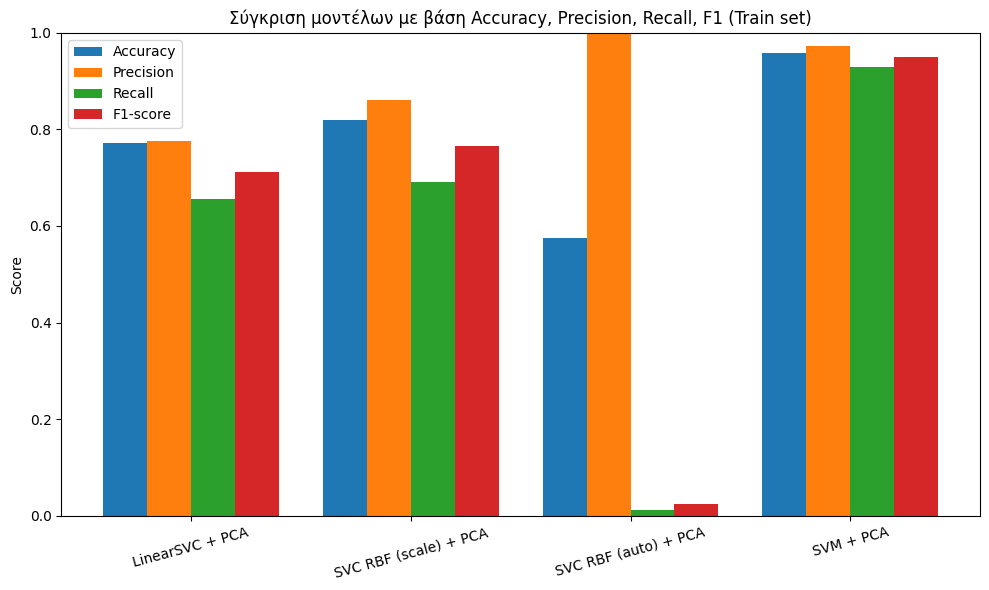

In [51]:
models = [
    "LinearSVC + PCA",
    "SVC RBF (scale) + PCA",
    "SVC RBF (auto) + PCA",
    "SVM + PCA"
]

accuracy = [
    train_accuracy_linear,
    train_accuracy_svc,
    train_accuracy_svc_auto,
    train_accuracy_svm
]

precision = [
    train_precision_linear,
    train_precision_svc,
    train_precision_svc_auto,
    train_precision_svm
]

recall = [
    train_recall_linear,
    train_recall_svc,
    train_recall_svc_auto,
    train_recall_svm
]

f1 = [
    train_f1_linear,
    train_f1_svc,
    train_f1_svc_auto,
    train_f1_svm
]

x = np.arange(len(models))
width = 0.2

plt.figure(figsize=(10,6))

plt.bar(x - 1.5*width, accuracy, width, label="Accuracy")
plt.bar(x - 0.5*width, precision, width, label="Precision")
plt.bar(x + 0.5*width, recall, width, label="Recall")
plt.bar(x + 1.5*width, f1, width, label="F1-score")

plt.xticks(x, models, rotation=15)
plt.ylabel("Score")
plt.ylim(0, 1)
plt.title("Σύγκριση μοντέλων με βάση Accuracy, Precision, Recall, F1 (Train set)")
plt.legend()

plt.tight_layout()
plt.show()

### Test Metrics Bar Plot By Classifier

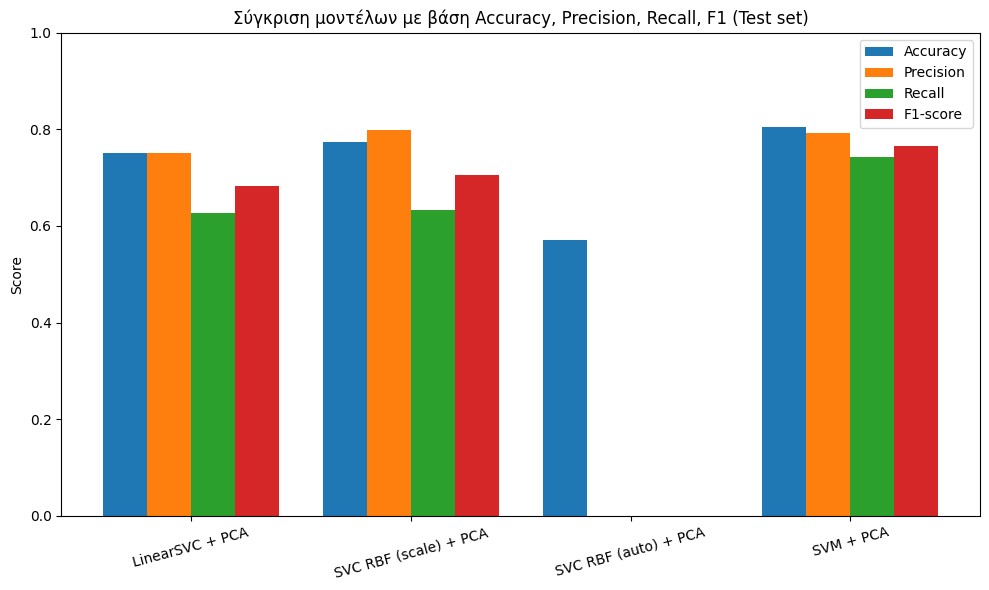

In [52]:
models = [
    "LinearSVC + PCA",
    "SVC RBF (scale) + PCA",
    "SVC RBF (auto) + PCA",
    "SVM + PCA"
]

accuracy = [
    test_accuracy_linear,
    test_accuracy_svc,
    test_accuracy_svc_auto,
    test_accuracy_svm
]

precision = [
    test_precision_linear,
    test_precision_svc,
    test_precision_svc_auto,
    test_precision_svm
]

recall = [
    test_recall_linear,
    test_recall_svc,
    test_recall_svc_auto,
    test_recall_svm
]

f1 = [
    test_f1_linear,
    test_f1_svc,
    test_f1_svc_auto,
    test_f1_svm
]

x = np.arange(len(models))
width = 0.2

plt.figure(figsize=(10,6))

plt.bar(x - 1.5*width, accuracy, width, label="Accuracy")
plt.bar(x - 0.5*width, precision, width, label="Precision")
plt.bar(x + 0.5*width, recall, width, label="Recall")
plt.bar(x + 1.5*width, f1, width, label="F1-score")

plt.xticks(x, models, rotation=15)
plt.ylabel("Score")
plt.ylim(0, 1)
plt.title("Σύγκριση μοντέλων με βάση Accuracy, Precision, Recall, F1 (Test set)")
plt.legend()

plt.tight_layout()
plt.show()

### Observation

Η τιμή της παραμέτρου γ (Gamma) που χρησιμοποιείται ως default είναι η scale που χρησιμοποιεί την συνάρτηση 1 / (n_features * X.var()), δηλαδή εξαρτάται τόσο από τον αριθμό χαρακτηριστικών όσο και από τη διακύμανση των δεδομένων. Αντίθετα, η τιμή auto χρησιμοποιεί την συνάρτηση 1 / n_features, δηλαδή εξαρτάται μόνο από τον αριθμό χαρακτηριστικών και αγνοεί τη διακύμανση.

## Question 9

### Gaussian Naive Bayes

In [53]:
x_train_dense = x_train.toarray()
x_test_dense = x_test.toarray()

gnb = GaussianNB()
gnb.fit(x_train_dense, y_train)

y_train_pred_gnb = gnb.predict(x_train_dense)
y_test_pred_gnb = gnb.predict(x_test_dense)

### GNB Metrics Calculation

In [54]:
print("GaussianNB Train set:")
print("Accuracy :", accuracy_score(y_train, y_train_pred_gnb))
print("Precision:", precision_score(y_train, y_train_pred_gnb))
print("Recall   :", recall_score(y_train, y_train_pred_gnb))
print("F1-score :", f1_score(y_train, y_train_pred_gnb))

print("\nGaussianNB Test set:")
print("Accuracy :", accuracy_score(y_test, y_test_pred_gnb))
print("Precision:", precision_score(y_test, y_test_pred_gnb))
print("Recall   :", recall_score(y_test, y_test_pred_gnb))
print("F1-score :", f1_score(y_test, y_test_pred_gnb))


GaussianNB Train set:
Accuracy : 0.8651291782221574
Precision: 0.7611168562564633
Recall   : 1.0
F1-score : 0.8643570170287728

GaussianNB Test set:
Accuracy : 0.615485564304462
Precision: 0.5352697095435685
Recall   : 0.7889908256880734
F1-score : 0.6378244746600742


### Observation

Η Recall είναι η πιο σημαντική μετρική στο συγκεκριμένο πρόβλημα, καθώς το σύστημα καλείται να εντοπίζει πραγματικά περιστατικά φυσικών καταστροφών. Ένα χαμηλό recall σημαίνει ότι πραγματικά επικίνδυνα γεγονότα δεν ανιχνεύονται (false negatives), κάτι που μπορεί να έχει σοβαρές συνέπειες για την έγκαιρη προειδοποίηση και την ασφάλεια του πληθυσμού.